In [1]:
import sys
sys.path.append('../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.pyc'>

In [5]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        #AIT_V1_strength = x['AIT_V1_strength']
        V1_r_transform = x['V1_r_transform'] 
        #AIT_r_transform = x['AIT_r_transform']
    )
    return {
        'loss': 
            abs(vals['V1_to_AIT'] - 0.04) + abs(vals['AIT_to_PFC'] - 0.03),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {#'AIT_V1_strength': hp.uniform('AIT_V1_strength', 0, 1)
                     'V1_r_transform': hp.uniform('V1_r_transform', 0, 1)
                     #'AIT_r_transform': hp.uniform('AIT_r_transform', 0, 1),
                    },
            algo = rand.suggest,
            max_evals = 50,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('V1_r_transform_data', 'w'))

running Vision_Model#20160727-141419-03d848ab
Simulation finished in 0:00:28.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_compare_to_result_strength = 0.12966085928477078
_D = 32
_motor_feedback = 0.06848695023305285
_motor_transform = 2.0
_finger_feedback = 0.9603352183200515
_motor_to_fingers_strength = 0.8079719992231219
_AIT_V1_strength = 0.06848695023305285
_V1_r_transform = 0.6964691855978616
_AIT_r_transform = 0.8079719992231219
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.017000000000000001
MC_to_finger = 0.020999999999999991
PFC_to_PMC = 0.021000000000000005
PMC_to_MC = 0.013999999999999999
V1_to_AIT = 0.024
finger_to_end = 0.030000000000000013
retina_to_V1 = 0.0080000000000000002
running Vision_Model#20160727-141509-7739df34
Simulation finished in 0:00:27.                                                 
_runtime = 2
_result_feedback = 0.4195086163487056
_compare_to_result_s

In [6]:
print(best)

{'V1_r_transform': 0.10606490595473272}


How does this compare to the value that the multi-parameter hyperopt gave for this variable? It's very close - the initial value for the V1_r_transform parameter is 0.11090645719111913.

In [8]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

Since benchmarks stores all the data in one folder, I filter the data by removing files that contain non-standard values for the parameters supposedly held constant. 

In [9]:
df = df[df._AIT_V1_strength == 0.06848695023305285]
df = df[df._AIT_r_transform == 0.8079719992231219]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
2,0.018,0.021,0.020,0.014,0.024,0.068487,0.807972,32,0.749342,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.026,0.008
3,0.021,0.032,0.021,0.014,0.023,0.068487,0.807972,32,0.105172,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.024,0.005
4,0.020,0.024,0.020,0.014,0.024,0.068487,0.807972,32,0.366696,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.036,0.006
9,0.016,0.020,0.020,0.014,0.026,0.068487,0.807972,32,0.780904,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.008
15,0.019,0.025,0.021,0.009,0.025,0.068487,0.807972,32,0.283042,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.037,0.005
23,0.018,0.021,0.020,0.014,0.025,0.068487,0.807972,32,0.669591,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.030,0.007
24,0.020,0.032,0.020,0.014,0.025,0.068487,0.807972,32,0.149402,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.024,0.005
25,0.017,0.024,0.021,0.016,0.022,0.068487,0.807972,32,0.940674,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.020,0.010
34,0.018,0.026,0.020,0.009,0.022,0.068487,0.807972,32,0.943850,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.027,0.010
38,0.020,0.032,0.020,0.014,0.025,0.068487,0.807972,32,0.093344,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.030,0.005


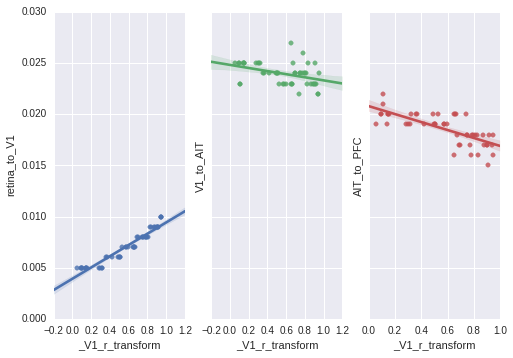

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_V1_r_transform'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)